### **Peliculas al Oscar**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer


In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [6]:
df = pd.read_csv("oscar.csv")
df.head()

,Unnamed: 0,Film,Year,Award,Nomination
0,0,Everything Everywhere All at Once,2022,7,11
1,1,All Quiet on the Western Front,2022,4,9
2,2,The Whale,2022,2,3
3,3,Top Gun: Maverick,2022,1,6
4,4,Black Panther: Wakanda Forever,2022,1,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1360 non-null   int64 
 1   Film        1359 non-null   object
 2   Year        1360 non-null   int64 
 3   Award       1360 non-null   int64 
 4   Nomination  1360 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 53.3+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'Film', 'Year', 'Award', 'Nomination'], dtype='object')

In [11]:
df = df[["Film", "Year", "Nomination"]]
df.head()

,Film,Year,Nomination
0,Everything Everywhere All at Once,2022,11
1,All Quiet on the Western Front,2022,9
2,The Whale,2022,3
3,Top Gun: Maverick,2022,6
4,Black Panther: Wakanda Forever,2022,5


In [12]:
mean_nominations = df.groupby("Film")["Nomination"].mean().sort_values(ascending=False)
print(mean_nominations.head(10))

Film
All About Eve                                        14.0
La La Land                                           14.0
Shakespeare in Love                                  13.0
Mary Poppins                                         13.0
Forrest Gump                                         13.0
The Shape of Water                                   13.0
From Here to Eternity                                13.0
The Lord of the Rings: The Fellowship of the Ring    13.0
Gone with the Wind                                   13.0
Who's Afraid of Virginia Woolf?                      13.0
Name: Nomination, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7528\334957799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_films.values, y=top_films.index, palette="magma")


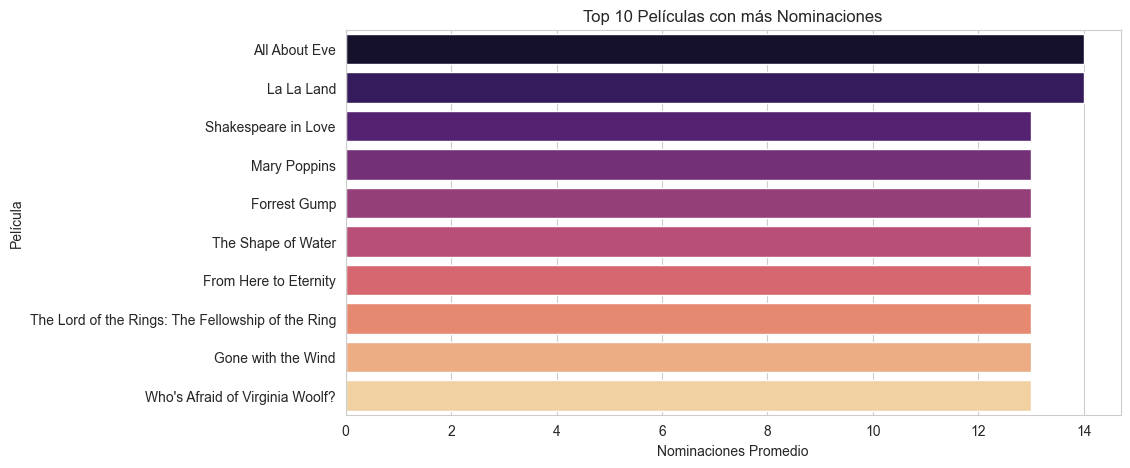

In [13]:
plt.figure(figsize=(10, 5))
top_films = mean_nominations.head(10)
sns.barplot(x=top_films.values, y=top_films.index, palette="magma")
plt.xlabel("Nominaciones Promedio")
plt.ylabel("Película")
plt.title("Top 10 Películas con más Nominaciones")
plt.show()

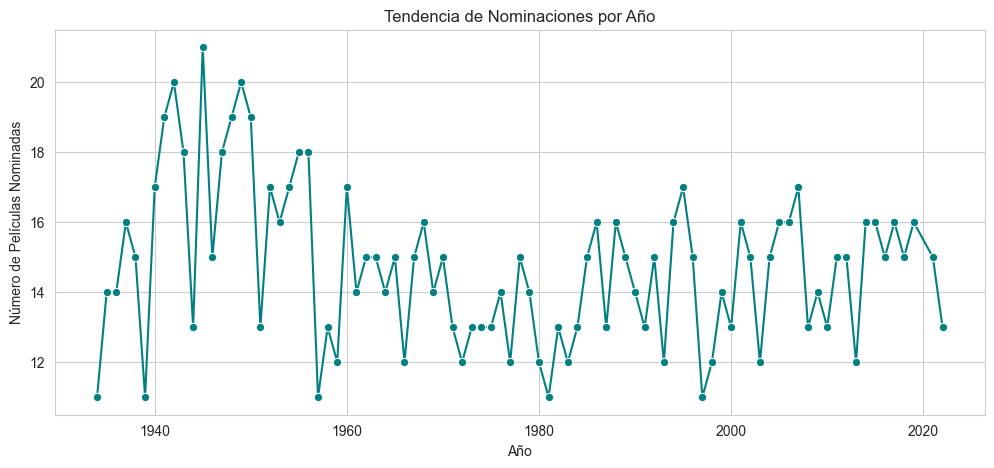

In [16]:

df = df[(df["Year"] >= 1920) & (df["Year"] <= 2025)]


plt.figure(figsize=(12, 5))
yearly_counts = df["Year"].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="teal")
plt.xlabel("Año")
plt.ylabel("Número de Películas Nominadas")
plt.title("Tendencia de Nominaciones por Año")
plt.show()


In [17]:
df = df[(df["Year"] >= 1920) & (df["Year"] <= 2025)]
fig = px.scatter(df, x="Year", y="Nomination", color="Film", size="Nomination",
                 title="Distribución de Nominaciones por Año", hover_name="Film")
fig.show()

